# TRIPS data analysis

### EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the large CSV file in chunks
chunksize = 10**6
chunk_list = []  # list to hold the batches

# Read the CSV file in chunks
for chunk in pd.read_csv('../TRIPS_data/lb_counts_with_cell_angles.csv', chunksize=chunksize, index_col=0):
    # Process each chunk here
    chunk_list.append(chunk)

# Concatenate all the chunks into a single DataFrame
trips_df = pd.concat(chunk_list)

# Display basic info
display("Basic Information:")
display(trips_df.info())

# Display the first few rows
display("\nFirst few rows:")
display(trips_df.head())


'Basic Information:'

<class 'pandas.core.frame.DataFrame'>
Index: 57627 entries, D1_lib8_bc1_10_bc2_10_bc3_67 to D1_lib7_bc1_9_bc2_96_bc3_55
Columns: 3071 entries, cell_angle to b4800
dtypes: float64(3071)
memory usage: 1.3+ GB


None

'\nFirst few rows:'

,cell_angle,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,...,b4780,b4784,b4787,b4789,b4790,b4793,b4795,b4796,b4799,b4800
Cell Barcode,,,,,,,,,,,,,,,,,,,,,
D1_lib8_bc1_10_bc2_10_bc3_67,242.539120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_lib8_bc1_10_bc2_10_bc3_74,41.013960,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_lib8_bc1_10_bc2_11_bc3_12,310.904330,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_lib8_bc1_10_bc2_11_bc3_34,1.399475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_lib8_bc1_10_bc2_12_bc3_46,264.440060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Display summary statistics
display("\nSummary Statistics:")
display(trips_df.describe())



'\nSummary Statistics:'

,cell_angle,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,...,b4780,b4784,b4787,b4789,b4790,b4793,b4795,b4796,b4799,b4800
count,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,...,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000
mean,183.001442,0.059677,0.012789,0.026255,0.003332,0.007896,0.001926,0.183022,0.014559,0.019140,...,0.001944,0.033352,0.003557,0.000885,0.003644,0.005744,0.005935,0.004807,0.005379,0.005865
std,102.456299,0.253589,0.113440,0.165021,0.058225,0.089481,0.043846,0.456193,0.121221,0.139902,...,0.044435,0.184420,0.059538,0.029736,0.060544,0.075800,0.077034,0.069913,0.073148,0.077265
min,0.009521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.539580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,182.349490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,270.652370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,359.985300,4.000000,2.000000,3.000000,2.000000,2.000000,1.000000,5.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000


In [3]:
# Check for missing values
display("\nMissing Values:")
display(trips_df.isnull().sum())

# Check for duplicate rows
display("\nDuplicate Rows:")
display(trips_df.duplicated().sum())

'\nMissing Values:'

cell_angle    0
b0002         0
b0003         0
b0004         0
b0005         0
             ..
b4793         0
b4795         0
b4796         0
b4799         0
b4800         0
Length: 3071, dtype: int64

'\nDuplicate Rows:'

0

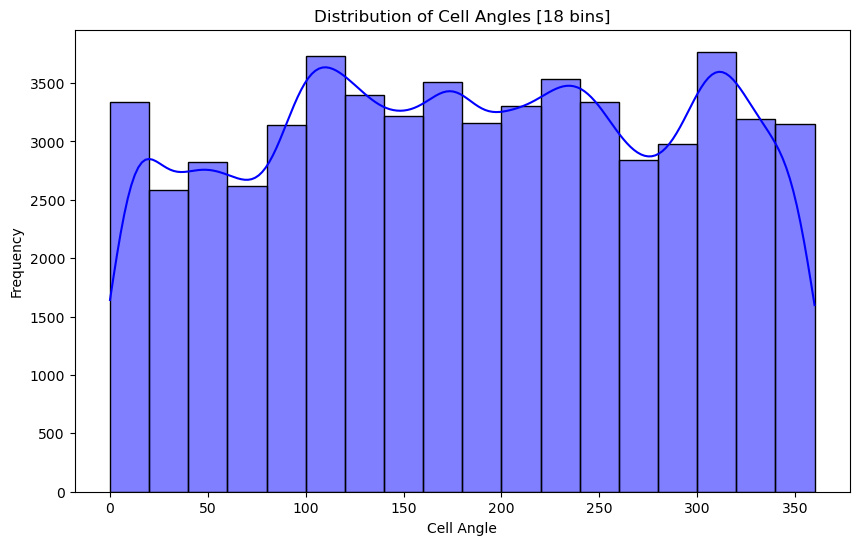

In [4]:
# Histogram of the 'cell_angle'
n_bins = 18
plt.figure(figsize=(10, 6))

sns.histplot(trips_df['cell_angle'], bins=n_bins,
             kde=True, color='blue')
plt.title(f'Distribution of Cell Angles [{n_bins} bins]')
plt.xlabel('Cell Angle')
plt.ylabel('Frequency')
plt.show()

In [5]:
cell_angles = trips_df['cell_angle']
cell_angles

Cell Barcode
D1_lib8_bc1_10_bc2_10_bc3_67    242.539120
D1_lib8_bc1_10_bc2_10_bc3_74     41.013960
D1_lib8_bc1_10_bc2_11_bc3_12    310.904330
D1_lib8_bc1_10_bc2_11_bc3_34      1.399475
D1_lib8_bc1_10_bc2_12_bc3_46    264.440060
                                   ...    
D1_lib7_bc1_9_bc2_94_bc3_21      58.899530
D1_lib7_bc1_9_bc2_94_bc3_52      75.914670
D1_lib7_bc1_9_bc2_95_bc3_52     207.060010
D1_lib7_bc1_9_bc2_96_bc3_37     266.678300
D1_lib7_bc1_9_bc2_96_bc3_55     146.209400
Name: cell_angle, Length: 57627, dtype: float64

In [6]:
df = trips_df.drop(columns=['cell_angle']).astype('int').T

n_cells = df.shape[1]
n_genes = df.shape[0]
# Display the shape of the DataFrame
display("Shape of the DataFrame:")
display(f"Number of cells: {n_cells}")
display(f"Number of genes: {n_genes}")

df 


'Shape of the DataFrame:'

'Number of cells: 57627'

'Number of genes: 3070'

Cell Barcode,D1_lib8_bc1_10_bc2_10_bc3_67,D1_lib8_bc1_10_bc2_10_bc3_74,D1_lib8_bc1_10_bc2_11_bc3_12,D1_lib8_bc1_10_bc2_11_bc3_34,D1_lib8_bc1_10_bc2_12_bc3_46,D1_lib8_bc1_10_bc2_12_bc3_73,D1_lib8_bc1_10_bc2_14_bc3_23,D1_lib8_bc1_10_bc2_14_bc3_64,D1_lib8_bc1_10_bc2_15_bc3_6,D1_lib8_bc1_10_bc2_17_bc3_19,...,D1_lib7_bc1_9_bc2_91_bc3_80,D1_lib7_bc1_9_bc2_92_bc3_44,D1_lib7_bc1_9_bc2_92_bc3_72,D1_lib7_bc1_9_bc2_92_bc3_85,D1_lib7_bc1_9_bc2_93_bc3_13,D1_lib7_bc1_9_bc2_94_bc3_21,D1_lib7_bc1_9_bc2_94_bc3_52,D1_lib7_bc1_9_bc2_95_bc3_52,D1_lib7_bc1_9_bc2_96_bc3_37,D1_lib7_bc1_9_bc2_96_bc3_55
b0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0003,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
genes = df.index.tolist()
genes 

['b0002',
 'b0003',
 'b0004',
 'b0005',
 'b0006',
 'b0007',
 'b0008',
 'b0009',
 'b0010',
 'b0014',
 'b0015',
 'b0019',
 'b0020',
 'b0023',
 'b0024',
 'b0025',
 'b0026',
 'b0027',
 'b0028',
 'b0029',
 'b0030',
 'b0031',
 'b0032',
 'b0033',
 'b0037',
 'b0038',
 'b0039',
 'b0046',
 'b0047',
 'b0048',
 'b0049',
 'b0050',
 'b0051',
 'b0052',
 'b0053',
 'b0054',
 'b0055',
 'b0056',
 'b0057',
 'b0058',
 'b0059',
 'b0060',
 'b0065',
 'b0066',
 'b0067',
 'b0068',
 'b0069',
 'b0070',
 'b0071',
 'b0072',
 'b0073',
 'b0074',
 'b0077',
 'b0080',
 'b0081',
 'b0082',
 'b0083',
 'b0084',
 'b0085',
 'b0086',
 'b0087',
 'b0088',
 'b0089',
 'b0090',
 'b0091',
 'b0092',
 'b0093',
 'b0094',
 'b0095',
 'b0096',
 'b0097',
 'b0098',
 'b0099',
 'b0101',
 'b0102',
 'b0103',
 'b0104',
 'b0106',
 'b0107',
 'b0109',
 'b0110',
 'b0111',
 'b0112',
 'b0113',
 'b0114',
 'b0115',
 'b0116',
 'b0118',
 'b0119',
 'b0120',
 'b0121',
 'b0122',
 'b0123',
 'b0124',
 'b0125',
 'b0126',
 'b0127',
 'b0128',
 'b0129',
 'b0130',


In [8]:
cells = df.columns.tolist()
cells 


['D1_lib8_bc1_10_bc2_10_bc3_67',
 'D1_lib8_bc1_10_bc2_10_bc3_74',
 'D1_lib8_bc1_10_bc2_11_bc3_12',
 'D1_lib8_bc1_10_bc2_11_bc3_34',
 'D1_lib8_bc1_10_bc2_12_bc3_46',
 'D1_lib8_bc1_10_bc2_12_bc3_73',
 'D1_lib8_bc1_10_bc2_14_bc3_23',
 'D1_lib8_bc1_10_bc2_14_bc3_64',
 'D1_lib8_bc1_10_bc2_15_bc3_6',
 'D1_lib8_bc1_10_bc2_17_bc3_19',
 'D1_lib8_bc1_10_bc2_18_bc3_28',
 'D1_lib8_bc1_10_bc2_19_bc3_69',
 'D1_lib8_bc1_10_bc2_20_bc3_79',
 'D1_lib8_bc1_10_bc2_21_bc3_44',
 'D1_lib8_bc1_10_bc2_21_bc3_70',
 'D1_lib8_bc1_10_bc2_21_bc3_77',
 'D1_lib8_bc1_10_bc2_22_bc3_14',
 'D1_lib8_bc1_10_bc2_23_bc3_11',
 'D1_lib8_bc1_10_bc2_23_bc3_4',
 'D1_lib8_bc1_10_bc2_23_bc3_41',
 'D1_lib8_bc1_10_bc2_24_bc3_29',
 'D1_lib8_bc1_10_bc2_24_bc3_4',
 'D1_lib8_bc1_10_bc2_24_bc3_6',
 'D1_lib8_bc1_10_bc2_24_bc3_67',
 'D1_lib8_bc1_10_bc2_24_bc3_80',
 'D1_lib8_bc1_10_bc2_26_bc3_40',
 'D1_lib8_bc1_10_bc2_27_bc3_48',
 'D1_lib8_bc1_10_bc2_27_bc3_68',
 'D1_lib8_bc1_10_bc2_28_bc3_45',
 'D1_lib8_bc1_10_bc2_28_bc3_80',
 'D1_lib8_bc1_

In [9]:

# ----- Binning the cell angles -----
# Define bins from 0 to 360 in 10-degree increments.
bin_angle_increment = 10
bins = np.arange(0, 370, bin_angle_increment) # 0, 10, 20, ..., 360

# Create labels for the bins, e.g., "0-10", "10-20", ..., "350-360"
labels = [f"{b}-{b+bin_angle_increment}" for b in bins[:-1]]

# Bin the angles. Using right=False ensures that each bin covers [start, start+10).
angle_bins = pd.cut(cell_angles, bins=bins, right=False, labels=labels, include_lowest=True)

angle_bins


Cell Barcode
D1_lib8_bc1_10_bc2_10_bc3_67    240-250
D1_lib8_bc1_10_bc2_10_bc3_74      40-50
D1_lib8_bc1_10_bc2_11_bc3_12    310-320
D1_lib8_bc1_10_bc2_11_bc3_34       0-10
D1_lib8_bc1_10_bc2_12_bc3_46    260-270
                                 ...   
D1_lib7_bc1_9_bc2_94_bc3_21       50-60
D1_lib7_bc1_9_bc2_94_bc3_52       70-80
D1_lib7_bc1_9_bc2_95_bc3_52     200-210
D1_lib7_bc1_9_bc2_96_bc3_37     260-270
D1_lib7_bc1_9_bc2_96_bc3_55     140-150
Name: cell_angle, Length: 57627, dtype: category
Categories (36, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '320-330' < '330-340' < '340-350' < '350-360']

In [10]:
gene_vs_cell_angle_bins_df = df.copy()

# Replace the columns (cell barcodes) with their corresponding angle bin values
new_columns = gene_vs_cell_angle_bins_df.columns.map(angle_bins)
gene_vs_cell_angle_bins_df.columns = new_columns

display(gene_vs_cell_angle_bins_df)


Cell Barcode,240-250,40-50,310-320,0-10,260-270,280-290,210-220,220-230,30-40,270-280,...,100-110,200-210,150-160,40-50,260-270,50-60,70-80,200-210,260-270,140-150
b0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0003,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/ipykernel_30365/40724481.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  summed_df = gene_vs_cell_angle_bins_df.groupby(axis=1, level=0).sum()
/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/ipykernel_30365/40724481.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summed_df = gene_vs_cell_angle_bins_df.groupby(axis=1, level=0).sum()
/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/ipykernel_30365/40724481.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  bin_counts = gene_vs_cell_angle_bins_df.groupby(axis=1, level=0).size()
/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/ipykernel_30365/40724481.py:4: FutureWarn

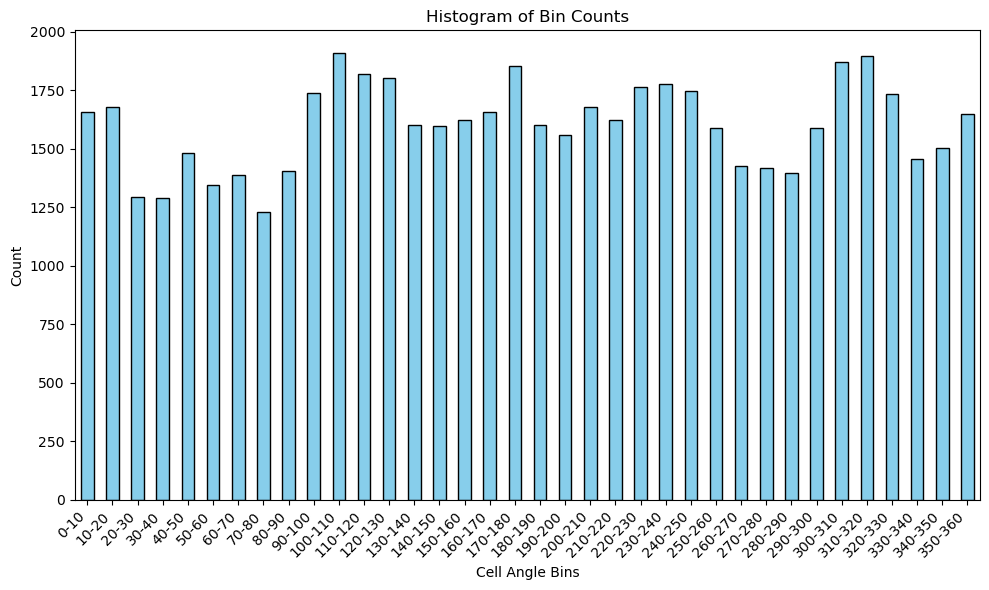

Cell Barcode
0-10       1657
10-20      1677
20-30      1294
30-40      1290
40-50      1480
50-60      1343
60-70      1386
70-80      1230
80-90      1403
90-100     1737
100-110    1910
110-120    1821
120-130    1801
130-140    1600
140-150    1598
150-160    1621
160-170    1656
170-180    1852
180-190    1601
190-200    1558
200-210    1680
210-220    1624
220-230    1764
230-240    1775
240-250    1747
250-260    1589
260-270    1427
270-280    1417
280-290    1394
290-300    1589
300-310    1870
310-320    1897
320-330    1734
330-340    1457
340-350    1502
350-360    1646
dtype: int64

Cell Barcode,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,...,260-270,270-280,280-290,290-300,300-310,310-320,320-330,330-340,340-350,350-360
b0002,108,98,79,83,112,103,92,89,91,143,...,87,87,86,94,79,107,97,92,94,95
b0003,15,25,18,21,17,21,14,28,27,25,...,19,16,14,19,19,18,21,15,15,17
b0004,33,45,31,32,35,37,46,36,44,55,...,31,35,35,39,47,59,54,32,28,49
b0005,1,6,6,3,4,9,3,2,10,3,...,3,8,3,4,1,4,6,2,3,8
b0006,18,17,9,13,11,11,12,9,8,15,...,5,7,11,12,11,12,15,10,8,12


In [11]:
# Sum the gene expressions within each bin
summed_df = gene_vs_cell_angle_bins_df.groupby(axis=1, level=0).sum()

bin_counts = gene_vs_cell_angle_bins_df.groupby(axis=1, level=0).size()
# Plot a histogram of the bin counts
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Bin Counts')
plt.xlabel('Cell Angle Bins')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the counts for each bin
display(bin_counts)
summed_df.to_csv('../TRIPS_data/gene_vs_cell_angle_df.csv')
display(summed_df.head())

In [12]:
# Initialize an empty DataFrame to store z-scores of the summed values
zscore_sum_df = pd.DataFrame(index=summed_df.index, columns=summed_df.columns)

# Calculate z-scores for the summed values for each gene within each bin
for gene in summed_df.index:
    values = summed_df.loc[gene].values
    if len(values) > 1:  # Only calculate z-score if there are multiple values
        mean = np.mean(values)
        std = np.std(values, ddof=1)  # Use ddof=1 for sample standard deviation
        z_scores = [(x - mean) / std if std != 0 else 0 for x in values]  # Avoid division by zero
    else:
        z_scores = [0]  # If only one value, z-score is 0

    zscore_sum_df.loc[gene] = z_scores

# Display the z-score DataFrame
display(zscore_sum_df.head())

zscore_sum_df.to_csv('../TRIPS_data/zscore_sum_df.csv')

Cell Barcode,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,...,260-270,270-280,280-290,290-300,300-310,310-320,320-330,330-340,340-350,350-360
b0002,0.798968,0.15837,-1.058766,-0.802527,1.055207,0.478669,-0.225989,-0.418168,-0.290049,3.041062,...,-0.546288,-0.546288,-0.610348,-0.097869,-1.058766,0.734908,0.09431,-0.225989,-0.097869,-0.033809
b0003,-1.017183,0.841628,-0.459539,0.098104,-0.645421,0.098104,-1.203064,1.399272,1.213391,0.841628,...,-0.273658,-0.831302,-1.203064,-0.273658,-0.273658,-0.459539,0.098104,-1.017183,-1.017183,-0.645421
b0004,-0.964092,0.317409,-1.177675,-1.070884,-0.750508,-0.536925,0.4242,-0.643717,0.210617,1.385326,...,-1.177675,-0.750508,-0.750508,-0.323342,0.530992,1.812493,1.278534,-1.070884,-1.49805,0.744576
b0005,-1.543127,0.237404,0.237404,-0.830914,-0.474808,1.305723,-0.830914,-1.187021,1.661829,-0.830914,...,-0.830914,0.949616,-0.830914,-0.474808,-1.543127,-0.474808,0.237404,-1.187021,-0.830914,0.949616
b0006,1.162554,0.945705,-0.789091,0.078307,-0.355392,-0.355392,-0.138543,-0.789091,-1.005941,0.512006,...,-1.656489,-1.22279,-0.355392,-0.138543,-0.355392,-0.138543,0.512006,-0.572242,-1.005941,-0.138543


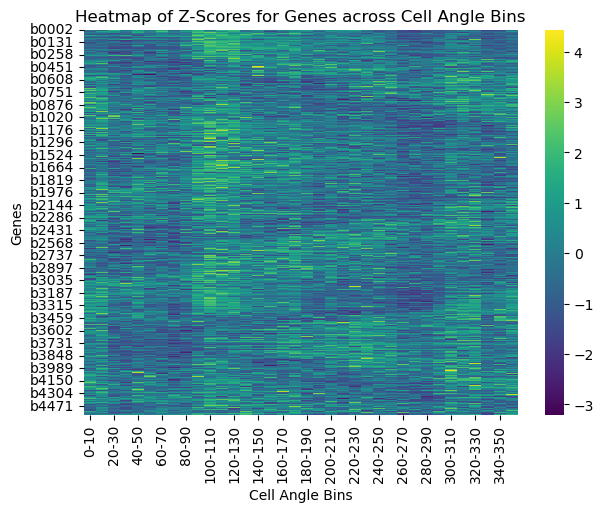

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming zscore_sum_df already exists from previous steps

# Ensure all values in zscore_sum_df are numeric
zscore_sum_df = zscore_sum_df.apply(pd.to_numeric, errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Create the heatmap using seaborn
sns.heatmap(zscore_sum_df, cmap='viridis', annot=False, fmt=".2f")

# Set the labels and title
plt.xlabel('Cell Angle Bins')
plt.ylabel('Genes')
plt.title('Heatmap of Z-Scores for Genes across Cell Angle Bins')

# Customize y-axis to show tick marks for every 100th gene
num_genes = zscore_sum_df.shape[0]
plt.yticks(np.arange(0, num_genes, step=100), zscore_sum_df.index[::100])

# Show the plot
plt.show()



## Mapping gene number to name

In [14]:
smart_table_df = pd.read_csv("../TRIPS_data/All-instances-of-Genes-in-Escherichia-coli-K-12-substr.-MG1655.csv", delimiter='\t')[["Genes", "blattner number", "EcoGene ID", "Common-Name"]]
smart_table_df.head()

,Genes,blattner number,EcoGene ID,Common-Name
0,EG11221,b1852,ECK1853,zwf
1,EG11929,b4046,ECK4038,zur
2,EG11167,b3040,ECK3031,zupT
3,EG10008,b4003,ECK3995,zraS
4,EG10482,b4004,ECK3996,zraR


In [15]:
# Create a dictionary with 'blattner number' as keys and 'Common-Name' as values
blattner_to_common_name = smart_table_df.set_index('blattner number')['Common-Name'].to_dict()

# Display the dictionary
blattner_to_common_name

{'b1852': 'zwf',
 'b4046': 'zur',
 'b3040': 'zupT',
 'b4003': 'zraS',
 'b4004': 'zraR',
 'b4002': 'zraP',
 'b1858': 'znuC',
 'b1859': 'znuB',
 'b1857': 'znuA',
 'b3292': 'zntR',
 'b1342': 'zntB',
 'b3469': 'zntA',
 'b0752': 'zitB',
 'b2412': 'zipA',
 'b1973': 'zinT',
 'b4814': 'zbiJ',
 'b3233': 'yhcB',
 'b3232': 'zapE',
 'b0102': 'zapD',
 'b0946': 'zapC',
 'b3928': 'zapB',
 'b2910': 'zapA',
 'b3427': 'yzgL',
 'b3808': 'yzcX',
 'b4824': 'ytjE',
 'b4395': 'ytjC',
 'b4387': 'ytjB',
 'b4568': 'ytjA',
 'b4823': 'ytiE',
 'b4721': 'ytiD',
 'b4720': 'ytiC',
 'b4767': 'ytiB',
 'b4715': 'ytiA',
 'b4802': 'ythB',
 'b4655': 'ythA',
 'b4822': 'ytgB',
 'b4800': 'ytgA',
 'b4230': 'ytfT',
 'b4485': 'ytfR',
 'b4227': 'ytfQ',
 'b4222': 'ytfP',
 'b4217': 'ytfK',
 'b4216': 'ytfJ',
 'b4215': 'ytfI',
 'b4212': 'ytfH',
 'b4210': 'ytfF',
 'b4209': 'ytfE',
 'b4206': 'ytfB',
 'b4205': 'ytfA',
 'b4821': 'ytcB',
 'b4622': 'ytcA',
 'b4686': 'yshB',
 'b4799': 'ysgD',
 'b3830': 'ysgA',
 'b4798': 'ysdE',
 'b4757': 'y

In [16]:
zscore_renamed_df = zscore_sum_df.copy()
# Replace gene IDs with their corresponding common names using the dictionary
zscore_renamed_df.index = zscore_renamed_df.index.map(blattner_to_common_name)

# Check for any rows that weren't changed (i.e., still have the original gene ID)
unchanged_rows = zscore_renamed_df.index[zscore_renamed_df.index.isna()]

# Check for collisions (duplicate common names)
collisions = zscore_renamed_df.index[zscore_renamed_df.index.duplicated(keep=False)]

# Display results
display("Unchanged Rows:", unchanged_rows)
display("Collisions:", collisions)

# Drop rows with NaN indices (unchanged rows)
zscore_renamed_df = zscore_renamed_df.dropna()

display(zscore_renamed_df.head())

'Unchanged Rows:'

Index([], dtype='object')

'Collisions:'

Index([], dtype='object')

Cell Barcode,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,...,260-270,270-280,280-290,290-300,300-310,310-320,320-330,330-340,340-350,350-360
thrA,0.798968,0.158370,-1.058766,-0.802527,1.055207,0.478669,-0.225989,-0.418168,-0.290049,3.041062,...,-0.546288,-0.546288,-0.610348,-0.097869,-1.058766,0.734908,0.094310,-0.225989,-0.097869,-0.033809
thrB,-1.017183,0.841628,-0.459539,0.098104,-0.645421,0.098104,-1.203064,1.399272,1.213391,0.841628,...,-0.273658,-0.831302,-1.203064,-0.273658,-0.273658,-0.459539,0.098104,-1.017183,-1.017183,-0.645421
thrC,-0.964092,0.317409,-1.177675,-1.070884,-0.750508,-0.536925,0.424200,-0.643717,0.210617,1.385326,...,-1.177675,-0.750508,-0.750508,-0.323342,0.530992,1.812493,1.278534,-1.070884,-1.498050,0.744576
yaaX,-1.543127,0.237404,0.237404,-0.830914,-0.474808,1.305723,-0.830914,-1.187021,1.661829,-0.830914,...,-0.830914,0.949616,-0.830914,-0.474808,-1.543127,-0.474808,0.237404,-1.187021,-0.830914,0.949616
yaaA,1.162554,0.945705,-0.789091,0.078307,-0.355392,-0.355392,-0.138543,-0.789091,-1.005941,0.512006,...,-1.656489,-1.222790,-0.355392,-0.138543,-0.355392,-0.138543,0.512006,-0.572242,-1.005941,-0.138543


## Generate SBML model for tyrR subnetwork of E.Coli network

In [17]:
# load GRN into networkx
import networkx as nx

graphml_file = "../TRIPS_data/TyrR_all_ancestors_graph_3_bins.gml"

DAG = nx.read_gml(graphml_file)

# Display the first few edges of the graph
display("First few edges of the DAG:")
display(list(DAG.edges())[:5])
# Display the number of nodes and edges
display("Number of nodes in the DAG:", DAG.number_of_nodes())
display("Number of edges in the DAG:", DAG.number_of_edges())
# Display the first few nodes of the graph
display("First few nodes of the DAG:")
display(list(DAG.nodes())[:5])
# Display the first few nodes with their attributes
display("First few nodes with their attributes:")
for node in list(DAG.nodes(data=True))[:5]:
    display(node)
# Display the first few edges with their attributes
display("First few edges with their attributes:")
for edge in list(DAG.edges(data=True))[:5]:
    display(edge)

'First few edges of the DAG:'

[('ompR', 'flhC'),
 ('ompR', 'flhD'),
 ('slyA', 'leuO'),
 ('sdiA', 'gadW'),
 ('zraR', 'fliA')]

'Number of nodes in the DAG:'

92

'Number of edges in the DAG:'

344

'First few nodes of the DAG:'

['aroF', 'folA', 'yaiA', 'ompR', 'slyA']

'First few nodes with their attributes:'

('aroF', {})

('folA', {})

('yaiA', {})

('ompR', {})

('slyA', {})

'First few edges with their attributes:'

('ompR', 'flhC', {'polarity': '-'})

('ompR', 'flhD', {'polarity': '-'})

('slyA', 'leuO', {'polarity': '+'})

('sdiA', 'gadW', {'polarity': '+'})

('zraR', 'fliA', {'polarity': '+'})

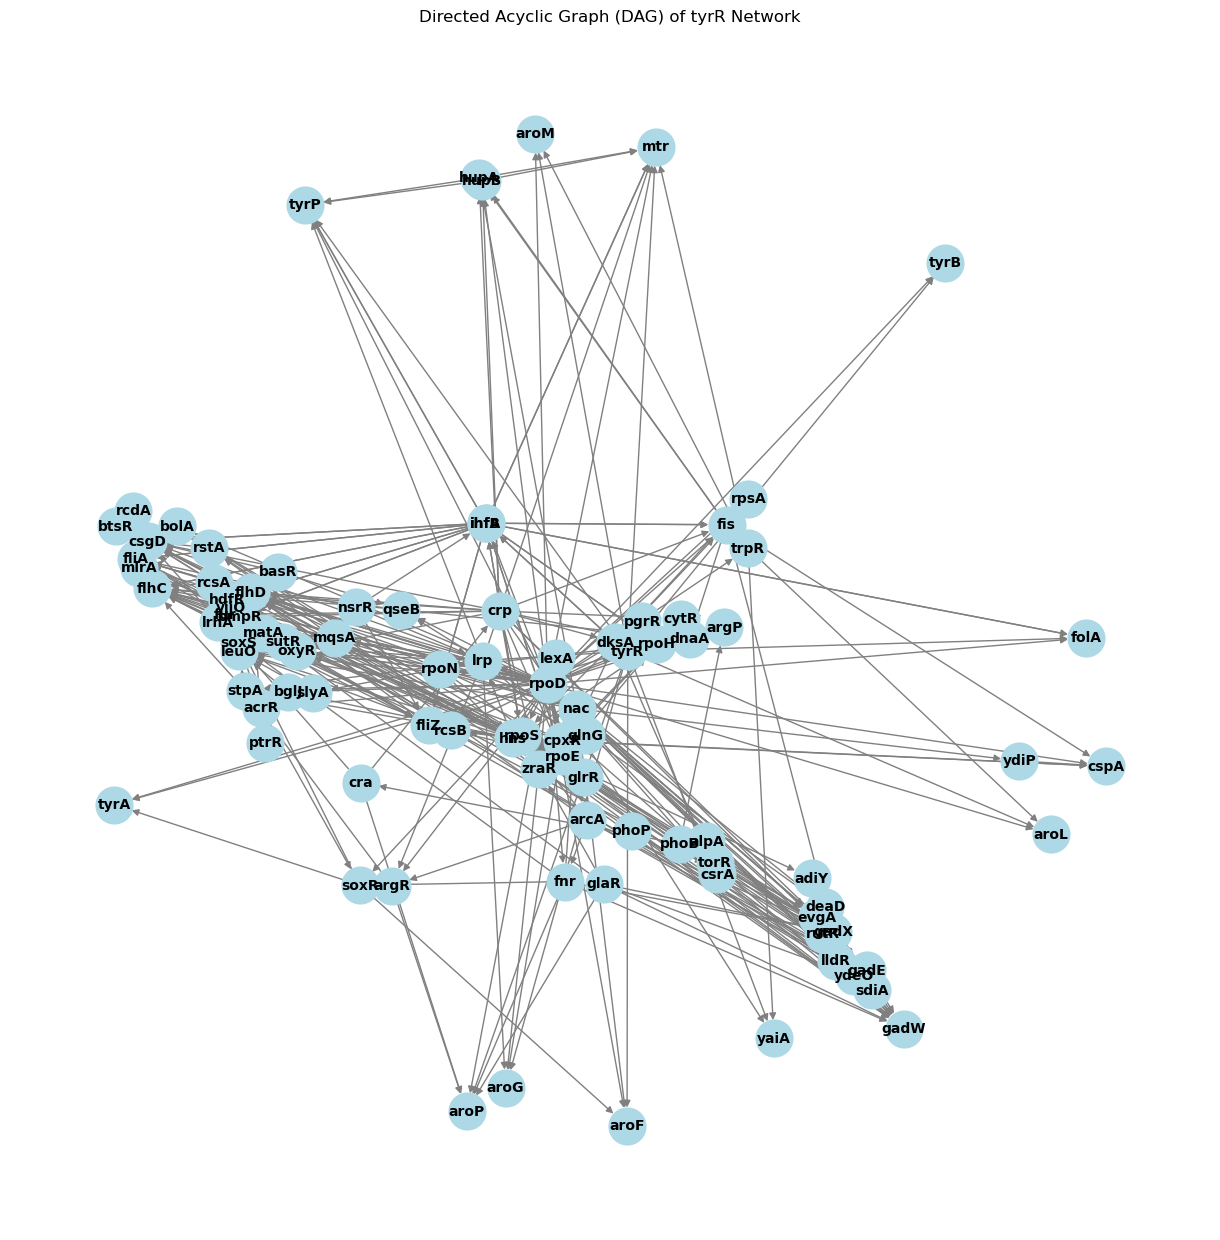

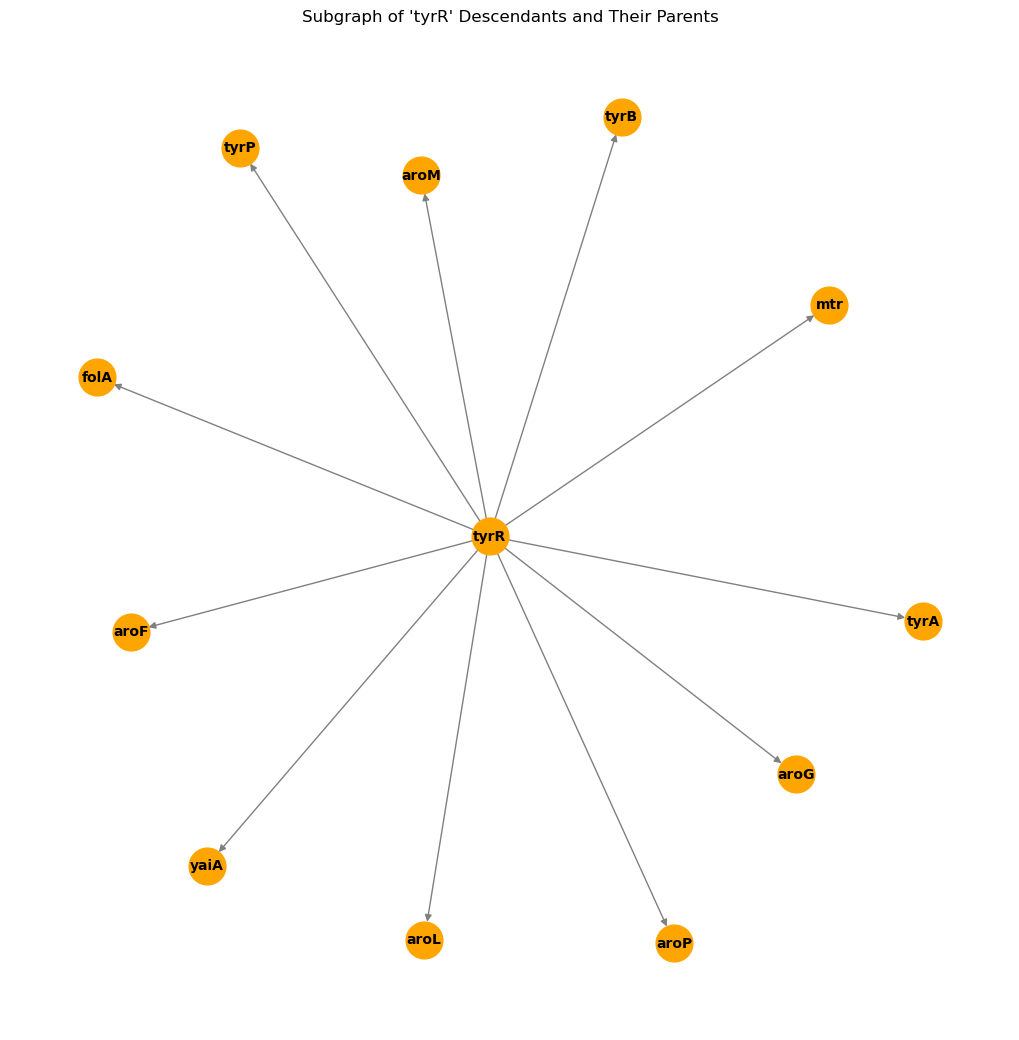

Original Graph: 92 nodes, 344 edges
Subgraph: 12 nodes, 11 edges


In [18]:
# display the graph 
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(DAG, seed=40)  # positions for all nodes
nx.draw(DAG, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Directed Acyclic Graph (DAG) of tyrR Network")
plt.show()

# Get the descendants of 'tyrR' and their parents
descendants = nx.descendants(DAG, 'tyrR')
nodes_to_include = set(descendants)
#for node in descendants:
#    nodes_to_include.update(DAG.predecessors(node))

# Include 'tyrR' itself
nodes_to_include.add('tyrR')

# Create the subgraph
descendants_with_parents_subgraph = DAG.subgraph(nodes_to_include)

# Plot the subgraph
plt.figure(figsize=(10, 10))
pos_descendants = nx.spring_layout(descendants_with_parents_subgraph, seed=42)
nx.draw(descendants_with_parents_subgraph, pos_descendants, with_labels=True, node_size=700, node_color='orange', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Subgraph of 'tyrR' Descendants and Their Parents")
plt.show()

# Compare the number of nodes and edges in the original graph and the subgraph
original_nodes = DAG.number_of_nodes()
original_edges = DAG.number_of_edges()
subgraph_nodes = descendants_with_parents_subgraph.number_of_nodes()
subgraph_edges = descendants_with_parents_subgraph.number_of_edges()

print(f"Original Graph: {original_nodes} nodes, {original_edges} edges")
print(f"Subgraph: {subgraph_nodes} nodes, {subgraph_edges} edges")


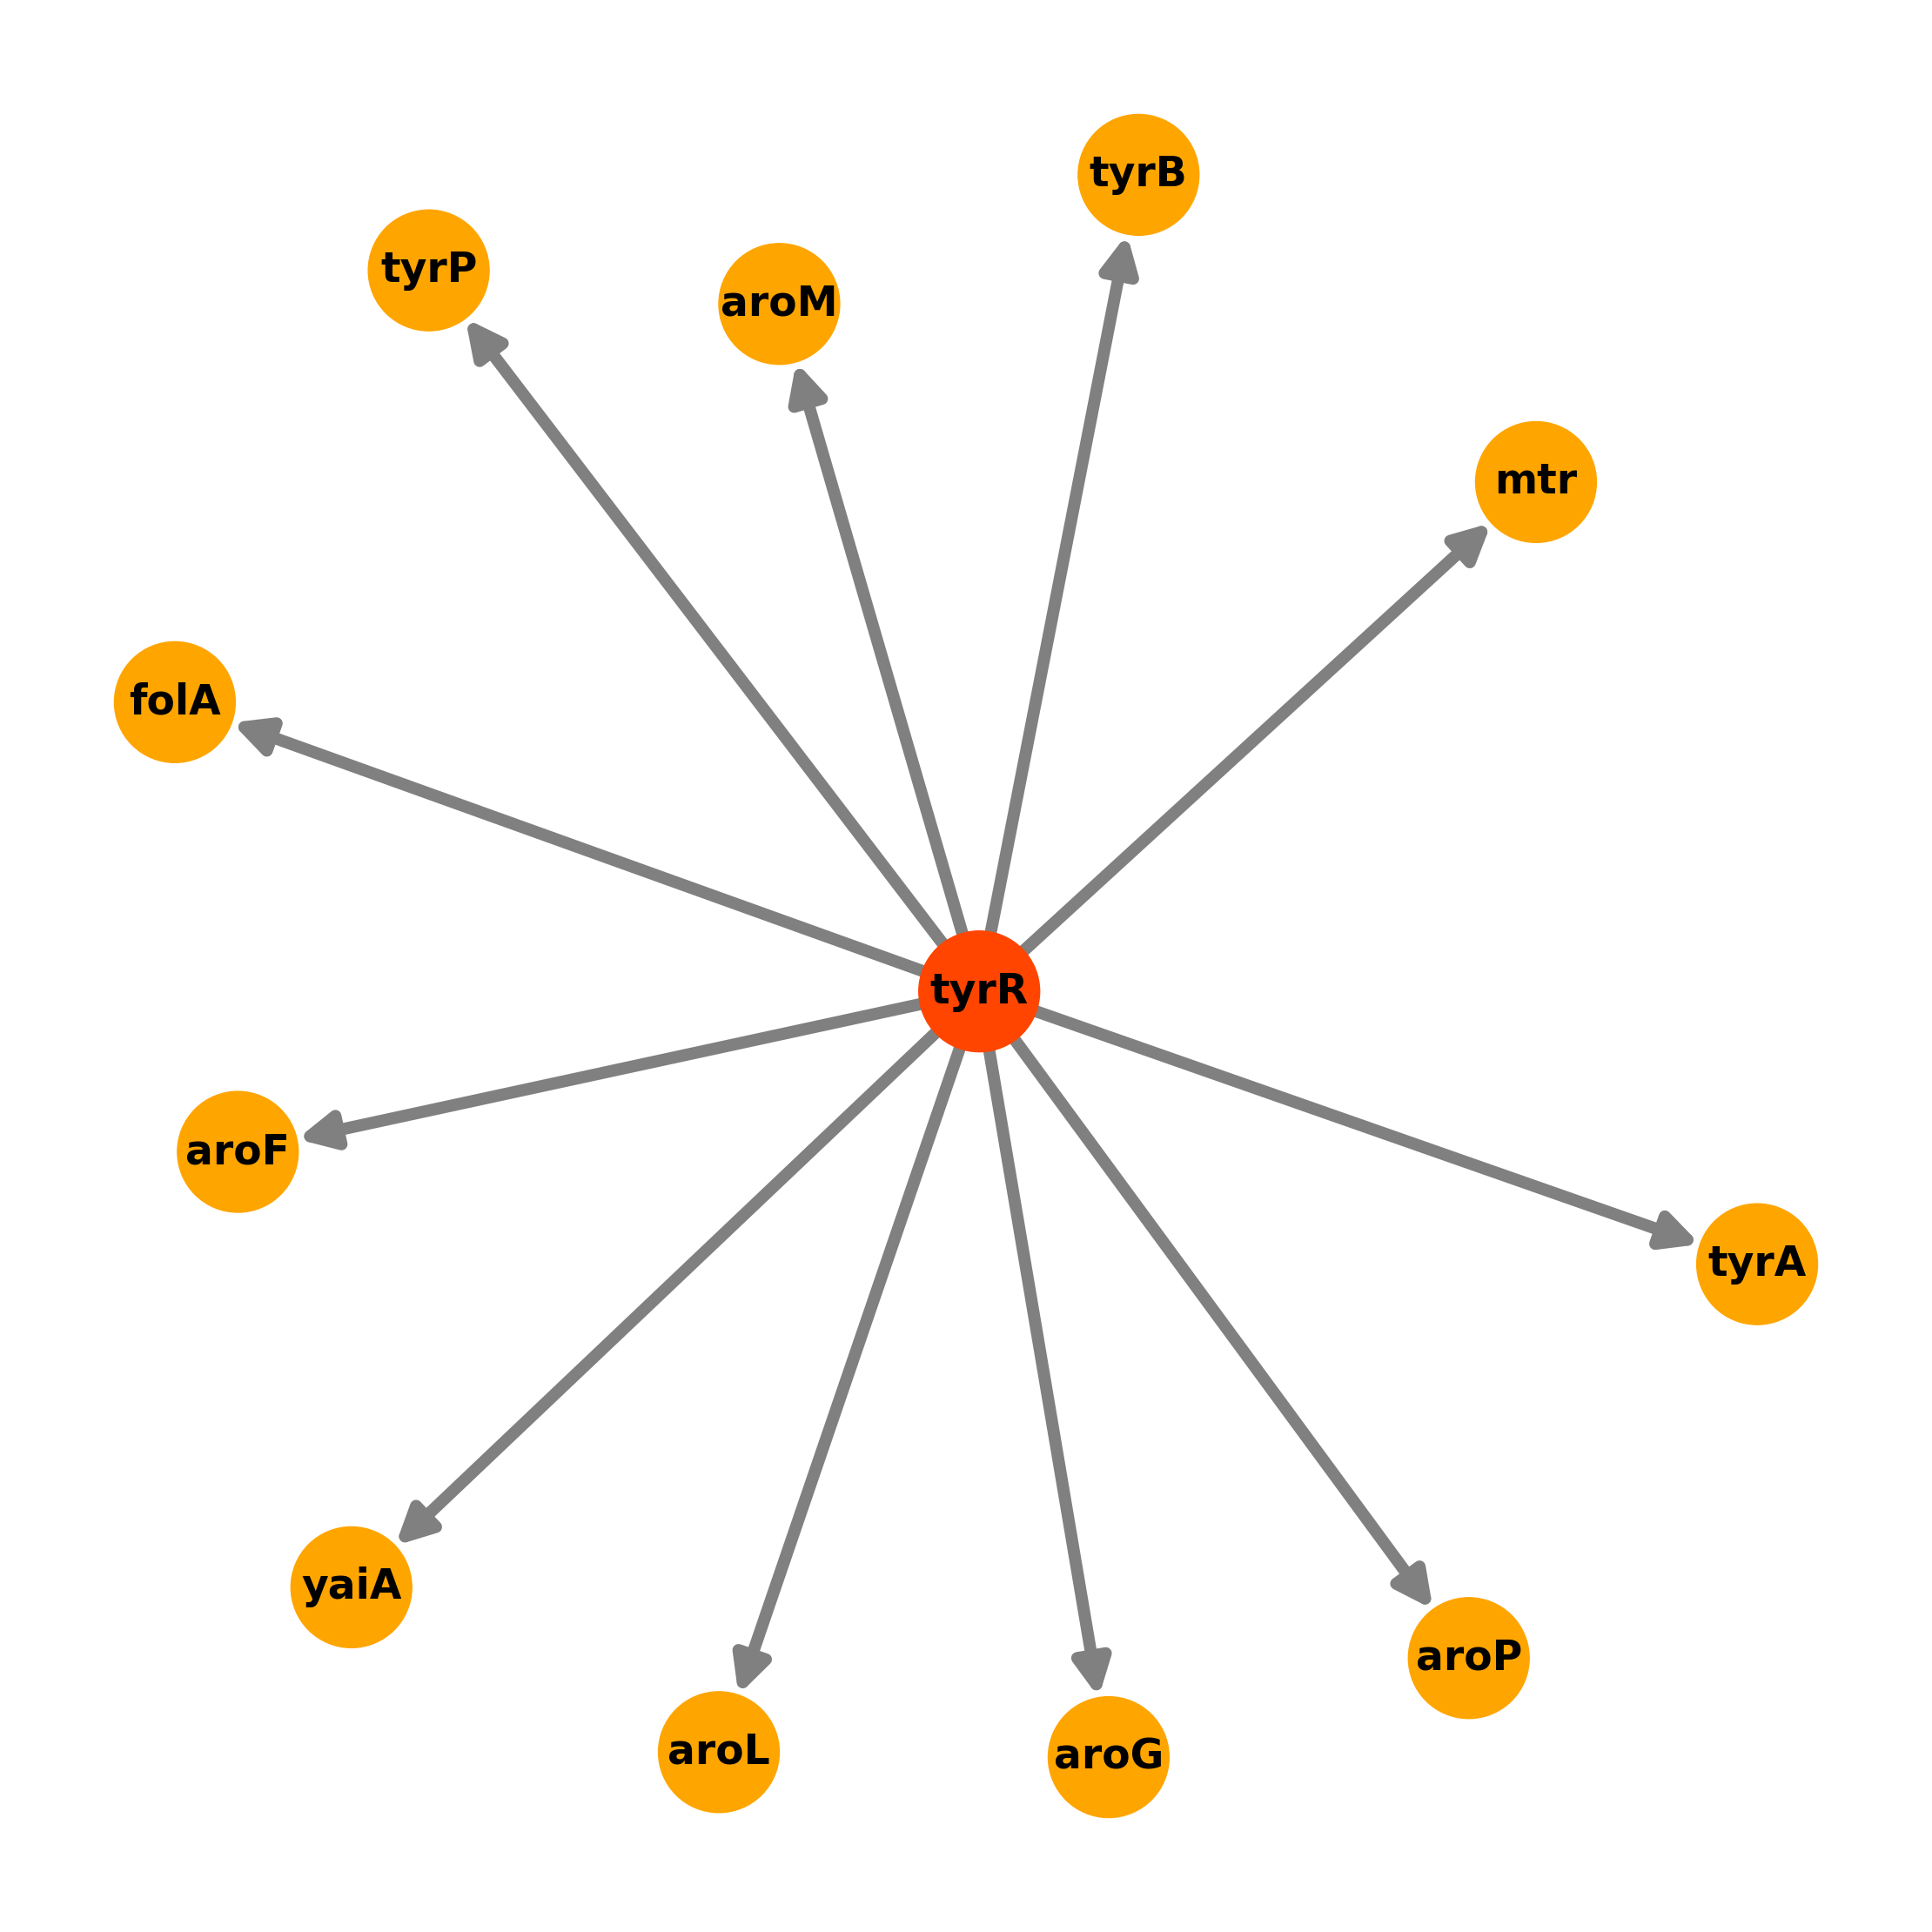

12

11

In [19]:
# Define node colors
default_node_color = 'orange'
darker_node_color = '#FF4500'  # Darker orange
lighter_node_color = '#FFD700'  # Lighter orange

# Identify root nodes (with no incoming edges)
root_nodes = [node for node, degree in descendants_with_parents_subgraph.in_degree() if degree == 0]
root_nodes = [node for node in root_nodes if node != 'tyrR']  # Exclude 'tyrR'

node_colors = []
for node in descendants_with_parents_subgraph.nodes():
    if node == 'tyrR':
        node_colors.append(darker_node_color)
    elif node in root_nodes:
        node_colors.append(lighter_node_color)
    else:
        node_colors.append(default_node_color)

# Plot the subgraph
plt.figure(figsize=(22, 22))
pos_descendants = nx.spring_layout(descendants_with_parents_subgraph, seed=42, k=2)
nx.draw(descendants_with_parents_subgraph, pos_descendants, with_labels=True,
        node_size=10000, node_color=node_colors, font_size=34, font_weight='bold',
        edge_color='gray', width=10, arrowsize=60)  # Set width parameter for thicker edges

# Save the figure with a transparent background and high DPI resolution
plt.savefig("graph_poster.png", dpi=300, transparent=True)
plt.show()

display(len(descendants_with_parents_subgraph.nodes()))
display(len(descendants_with_parents_subgraph.edges()))

In [20]:
graph_to_use = descendants_with_parents_subgraph

# Filter nodes to include only those present in zscore_renamed_df
nodes = []
nodes_not_in_df = []
for node in graph_to_use.nodes():
    if node in zscore_renamed_df.index:
        nodes.append(node)
    else:
        print(f"Node {node} is not in the DataFrame.")
        nodes_not_in_df.append(node)

blattner_to_common_name
dag_df = zscore_renamed_df.loc[nodes]


# Calculate the median values for each column in dag_df
median_values = dag_df.median()


# for node in nodes_not_in_df:
#     # Append a new row with the index as the node and column values as the median values
#     dag_df.loc[node] = median_values


# Function to insert row at random position
def insert_random_row(df, row, index_label):
    # Generate a random position
    pos = np.random.randint(0, len(df) + 1)
    # Split DataFrame into two parts
    df1 = df.iloc[:pos, :]
    df2 = df.iloc[pos:, :]
    # Insert the new row in between
    row_df = pd.DataFrame([row], index=[index_label], columns=df.columns)
    # Concatenate the parts and return
    return pd.concat([df1, row_df, df2])

# Insert each node at a random position
for node in nodes_not_in_df:
    dag_df = insert_random_row(dag_df, median_values, node)

dag_df.head()
display(dag_df.tail())


Cell Barcode,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,...,260-270,270-280,280-290,290-300,300-310,310-320,320-330,330-340,340-350,350-360
aroL,0.103544,-0.890483,-1.387496,-2.381523,-1.138989,-1.138989,0.849065,-0.890483,-0.144962,0.600558,...,0.103544,-0.890483,-0.890483,-0.393469,1.594585,1.097572,1.346078,0.600558,0.103544,1.346078
aroM,-0.362778,0.744003,-2.354986,-1.248204,-1.248204,-0.141422,0.079934,-1.469560,-0.805491,-0.141422,...,-0.141422,0.301291,-0.362778,0.965360,-0.805491,1.408072,-0.362778,0.522647,-0.362778,-1.026848
aroG,0.709800,1.511905,-0.092306,0.022281,1.282732,1.397318,0.251454,-0.206892,0.938973,-0.092306,...,-1.238171,-1.008998,-1.123584,1.511905,1.168145,1.282732,0.251454,1.282732,0.709800,0.480627
aroP,0.095322,-1.429823,-1.048537,-0.476608,-0.095322,1.525144,-0.857894,-0.476608,0.476608,1.906430,...,-0.381286,-0.857894,-1.334501,-0.190643,0.571929,0.285965,-0.381286,-0.285965,-0.285965,0.476608
aroF,-0.662511,0.228168,-1.058369,-0.860440,-0.266654,-0.068725,-0.068725,0.228168,-0.563547,1.316775,...,-1.058369,-0.464583,-0.959404,-0.464583,-0.662511,-0.167690,-0.761476,-0.266654,-0.266654,-0.068725


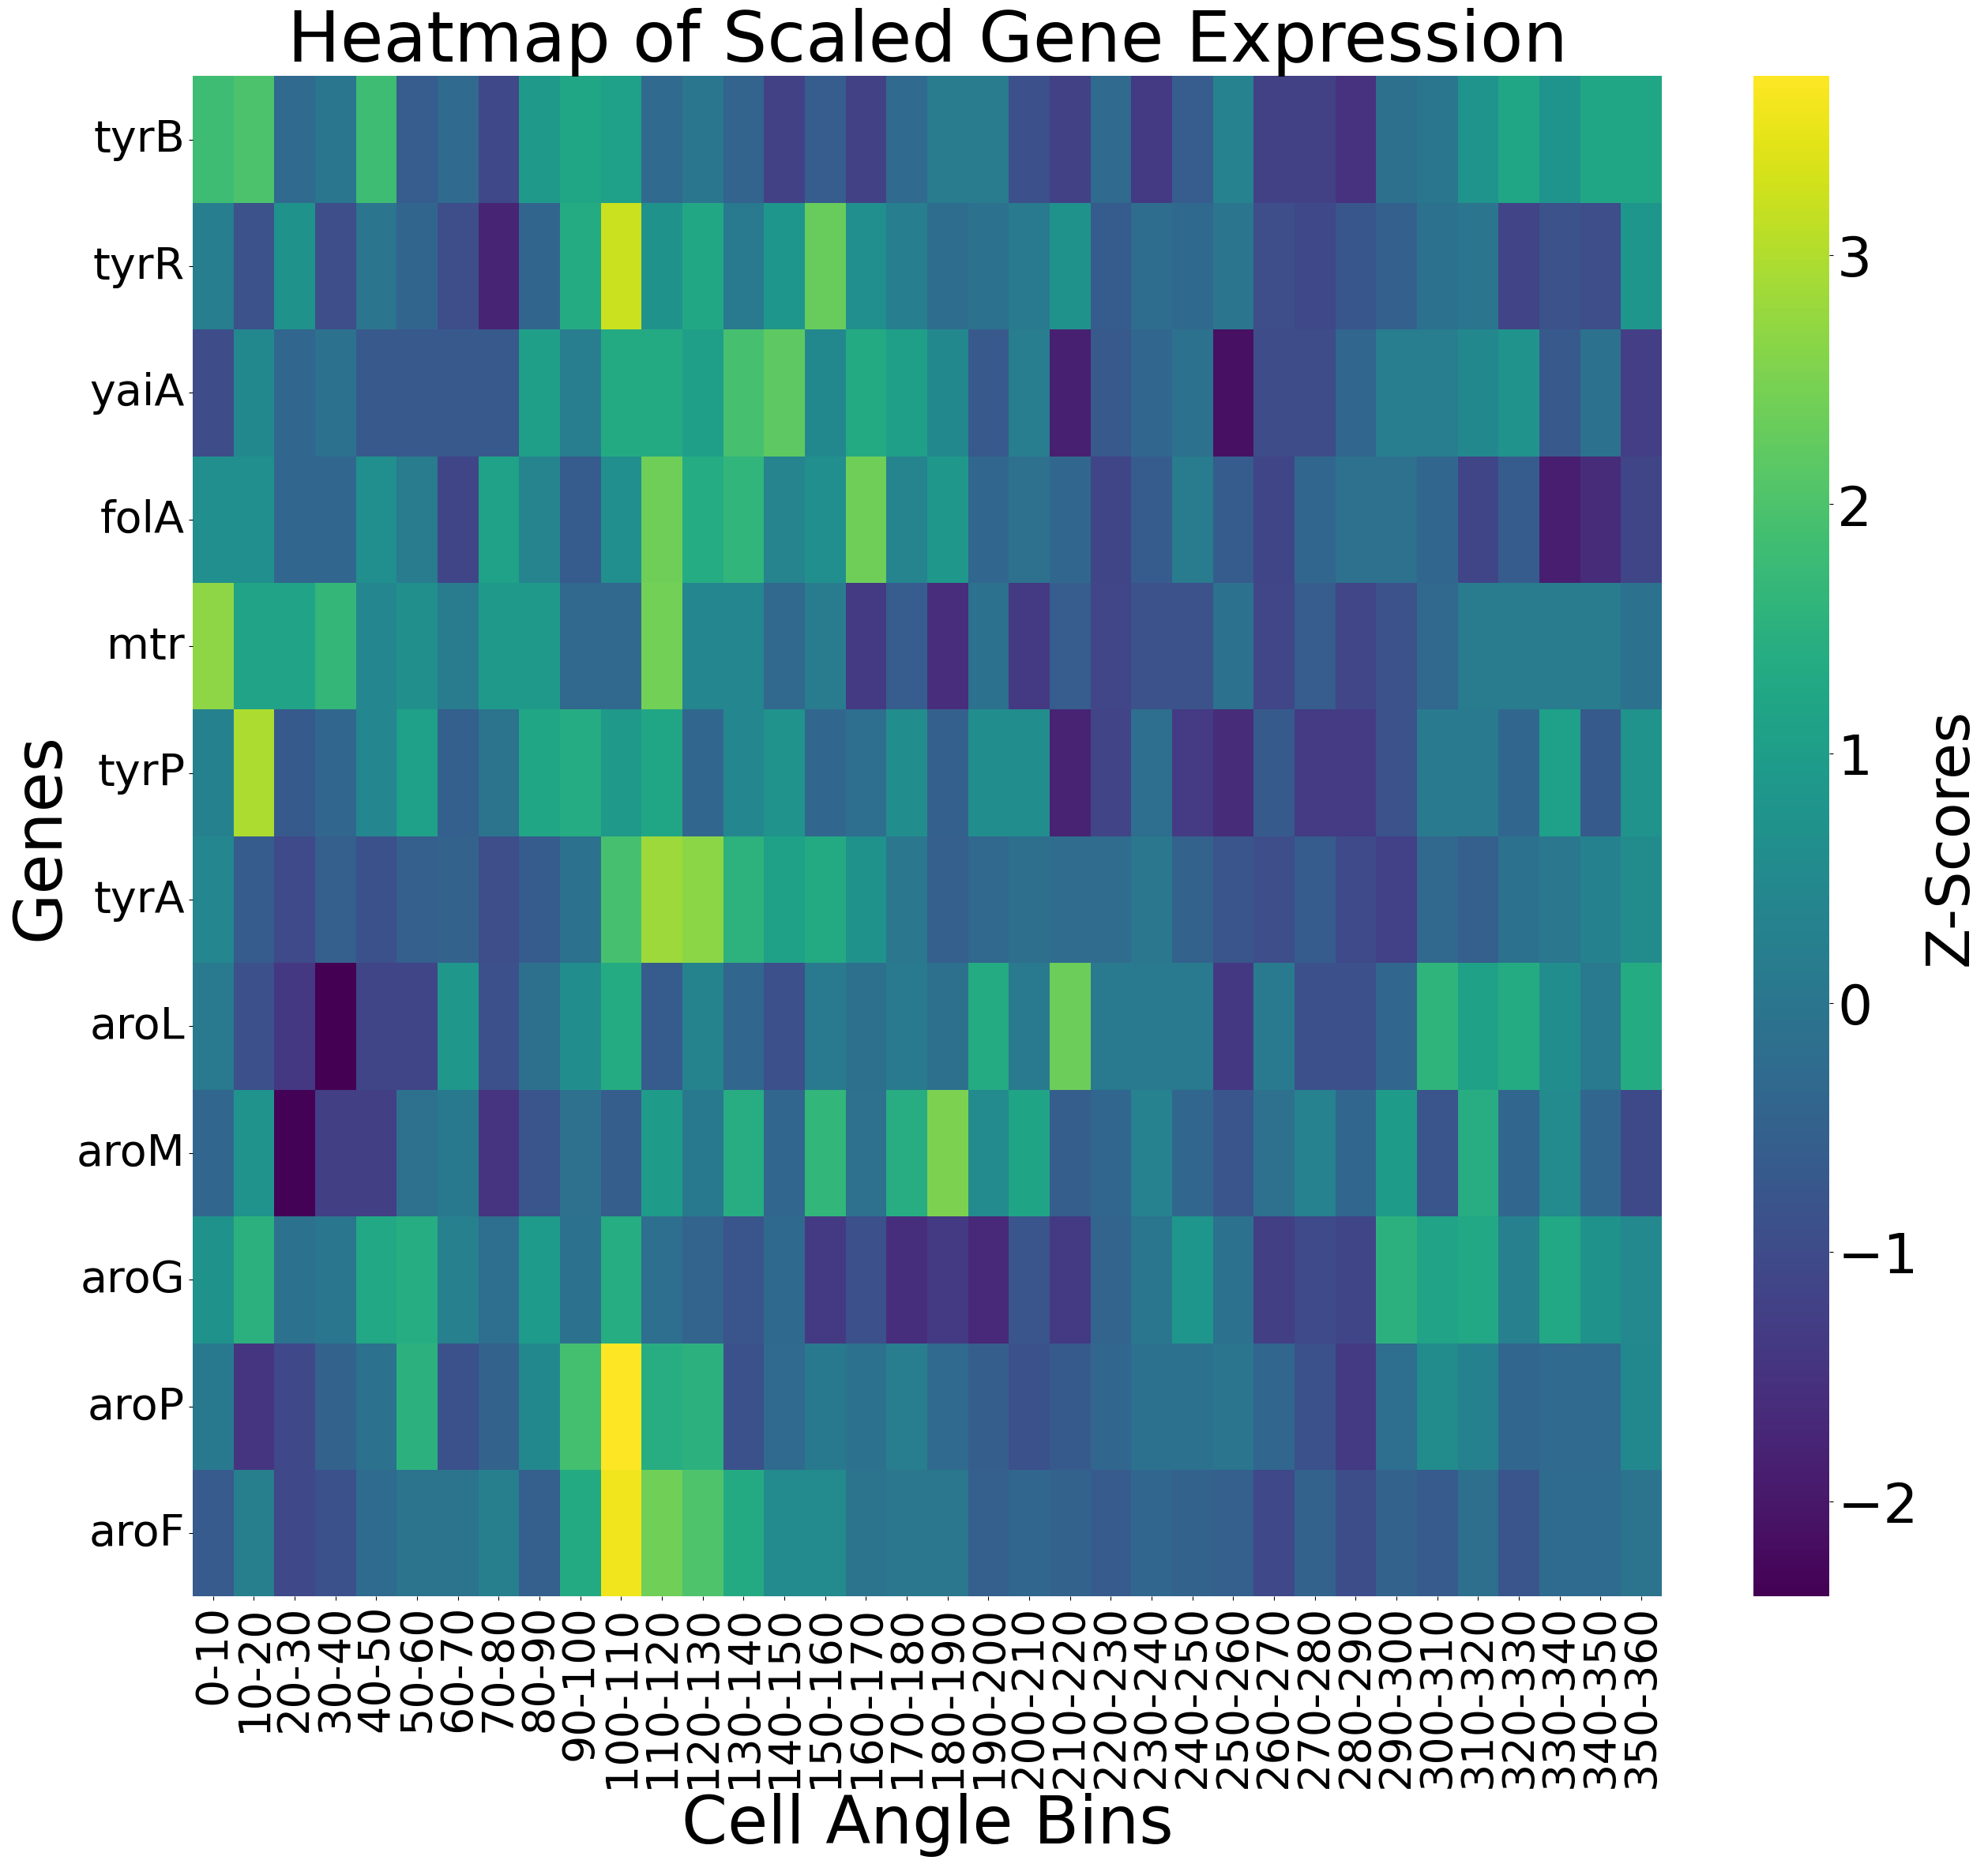

In [21]:


# Set up the matplotlib figure
plt.figure(figsize=(30, 25))

# Create the heatmap using seaborn
sns.heatmap(dag_df, cmap='viridis', annot=False, fmt=".2f", cbar_kws={'label': 'Z-Scores'}, xticklabels=True, yticklabels=True)

# Set the labels and title with increased font size
plt.xlabel('Cell Angle Bins', fontsize=60)
plt.ylabel('Genes', fontsize=60)
plt.title('Heatmap of Scaled Gene Expression', fontsize=64)

# Customize x-axis tick labels font size
plt.xticks(fontsize=40)

# Customize y-axis tick labels font size and rotation
plt.yticks(fontsize=40, rotation=0)  # You can adjust the rotation angle as needed

# Customize the color bar font size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=50)
cbar.set_ylabel('Z-Scores', fontsize=54)

# Save the figure with a transparent background and high DPI resolution, using bbox_inches to reduce white space
plt.savefig("heatmap_poster.png", dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


In [22]:
# population gene expression process model
# n cells? ~60000
# n genes? ~4000 (26 for subnetwork)
# n cell angle bins? 36

# observation model --> gene expression z-scores across cell angle bins

# see: https://github.com/CRISPR-CARB/nocap/blob/12-grn-dag-to-sbml/notebooks/pyciemss_test.ipynb


In [23]:
import networkx as nx
import tellurium as te
import libsbml

def create_sbml_model_from_nx(dag, output_file='model.xml', hill_params=None, dist_params=None):
    def dag_to_antimony(dag, hill_params, dist_params=None):
        # Default Hill parameters
        default_hill_params = {
            'beta': 1.0,
            'K': 1.0,
            'n': 1.0
        }
        
        default_dist_params = {
            'state_variable_distribution': 'uniform(0,10)',
            'parameter_distribution': 'uniform(0.1,3)'
        }

        if hill_params is None:
            hill_params = {}
        
        if dist_params is None:
            dist_params = {}

        # Check if the input graph is a directed acyclic graph (DAG)
        if not nx.is_directed_acyclic_graph(dag):
            raise ValueError("Input graph must be a directed acyclic graph (DAG).")

        model_str = ""
        model_str += "model grn_model()\n"
        # Global compartment declaration
        model_str += "  compartment default_compartment = 1;\n"

        # Check and retrieve initial values for nodes
        node_names = [node[0] for node in dag.nodes(data=True)] 
        
        #node_initial_values = [node[1].get('value', 1) for node in dag.nodes(data=True)]
        last_node_name = node_names[-1]

        # total_initial_values = sum(node_initial_values)
        # n_1_names_str = " + ".join(node_names[:-1])


        for node in dag.nodes(data=True):
            #print(node)
            value = node[1].get('value', 1)  # default value is 1 
            # if value is None:
            #     raise ValueError(f"Node {node[0]} is missing the 'value' attribute.")
            if not isinstance(value, (int, float)) or value < 0:
                raise ValueError(f"Node {node[0]} has an invalid 'value' attribute: {value}. Must be a non-negative number.")

            model_str += f"  species {node[0]} in default_compartment;\n"

            if node[0] == last_node_name:  # constraint
                pass
                #model_str += f"  {node[0]} := {total_initial_values} - ({n_1_names_str});\n"
                #model_str += f"  const {node[0]};\n"
                model_str += f"  {node[0]} = {value};\n"
            else: 
                model_str += f"  {node[0]} = {value};\n"

            # # Update the nodes to mark source nodes as constant
            # source_nodes = [node for node in dag.nodes() if dag.in_degree(node) == 0]
            # for source_node in source_nodes:
            #     model_str += f"  const {source_node};\n"

            # add distribution to chemical species
            # see: https://tellurium.readthedocs.io/en/latest/antimony.html#uncertainty-information 
            species_distribution = dist_params.get(f"{node[0]}",
                                                   default_dist_params['state_variable_distribution'])
            model_str += f"  {node[0]}.distribution = {species_distribution};\n"
            

        for source, target, data in dag.edges(data=True):
            # if 'interaction_type' not in data:
            #     raise ValueError(f"No 'interaction_type' attribute for edge {source} -> {target}")

            interaction_type = data['polarity'] #data['interaction_type'] 

            beta = hill_params.get(f'beta_{source}_to_{target}', default_hill_params['beta'])
            K = hill_params.get(f'K_{source}_to_{target}', default_hill_params['K'])
            n = hill_params.get(f'n_{source}_to_{target}', default_hill_params['n'])
            
            # get parameter distributions
            beta_distribution = dist_params.get(f'beta_{source}_to_{target}',
                                                   default_dist_params['parameter_distribution'])
            K_distribution = dist_params.get(f'K_{source}_to_{target}',
                                                   default_dist_params['parameter_distribution'])
            n_distribution = dist_params.get(f'n_{source}_to_{target}',
                                                   default_dist_params['parameter_distribution'])
            
            if interaction_type in ['activation', '+', '+/-']:
                rate_law = f"{beta} * {source}^n_{source}_to_{target} / (K_{source}_to_{target}^n_{source}_to_{target} + {source}^n_{source}_to_{target})"
                model_str += f"  J_{source}_to_{target}: {source} => {target}; {rate_law};\n"
            elif interaction_type in ['repression', '-']:
                rate_law = f"{beta} / (1 + ({source}^n_{source}_to_{target} / {K}))"
                model_str += f"  J_{source}_to_{target}: {source} => {target}; {rate_law};\n"
            else:
                raise ValueError(f"Unknown interaction type: {interaction_type}")

            # Add parameters
            model_str += f"  beta_{source}_to_{target} = {beta}; // units: mole_per_second\n"
            model_str += f"  K_{source}_to_{target} = {K}; // units: mole\n"
            model_str += f"  n_{source}_to_{target} = {n}; // units: dimensionless\n"

            # add parameter distributions
            model_str += f"  beta_{source}_to_{target}.distribution = {beta_distribution};\n"
            model_str += f"  K_{source}_to_{target}.distribution = {K_distribution};\n"
            model_str += f"  n_{source}_to_{target}.distribution = {n_distribution};\n"

        model_str += "end"

        return model_str

    antimony_str = dag_to_antimony(dag, hill_params)
    #print("Generated Antimony Model:")
    #print(antimony_str)

    # Load the model into Tellurium and convert to SBML
    try:
        r = te.loada(antimony_str)
    except Exception as e:
        print(f"Error in Antimony model: {e}")
        raise
    sbml_str = r.getSBML()

    # Post-process the SBML with libSBML to ensure correct configurations
    document = libsbml.readSBMLFromString(sbml_str)
    model = document.getModel()

    if model is not None:
        for species in model.getListOfSpecies():
            initial_value = species.getInitialConcentration()  # Get the initial concentration from Antimony
            species.setInitialAmount(0.0)  # Set initial amount to 0.0
            species.setInitialConcentration(initial_value)  # Set initial concentration
            species.setHasOnlySubstanceUnits(False)
            species.setName(species.getId())

    
        # Write updated SBML back to string
        sbml_str = libsbml.writeSBMLToString(document)



    # Save the updated SBML to a file
    with open(output_file, "w") as f:
        f.write(sbml_str)

    print(f"SBML model written to {output_file}")

In [ ]:
# set parameters for Hill equation
hill_parameters = {
}

dist_params = {}  # use default Uniform distributions for state variables and parameters

# Create SBML file
model_name = "tyrE_tiny_model"
sbml_filename = model_name + ".xml"
create_sbml_model_from_nx(descendants_with_parents_subgraph, 
                                  sbml_filename, 
                                  hill_params=hill_parameters,
                                  dist_params=dist_params)  # networkx to SBML


print(te.getODEsFromSBMLFile(sbml_filename))

SBML model written to ABCD_model.xml

vJ_tyrR_to_aroF = 1/(1+pow(tyrR,n_tyrR_to_aroF)/1)
vJ_tyrR_to_aroG = 1/(1+pow(tyrR,n_tyrR_to_aroG)/1)
vJ_tyrR_to_aroL = 1/(1+pow(tyrR,n_tyrR_to_aroL)/1)
vJ_tyrR_to_aroM = 1/(1+pow(tyrR,n_tyrR_to_aroM)/1)
vJ_tyrR_to_aroP = 1/(1+pow(tyrR,n_tyrR_to_aroP)/1)
vJ_tyrR_to_folA = 1*pow(tyrR,n_tyrR_to_folA)/(pow(K_tyrR_to_folA,n_tyrR_to_folA)+pow(tyrR,n_tyrR_to_folA))
vJ_tyrR_to_mtr = 1*pow(tyrR,n_tyrR_to_mtr)/(pow(K_tyrR_to_mtr,n_tyrR_to_mtr)+pow(tyrR,n_tyrR_to_mtr))
vJ_tyrR_to_tyrA = 1/(1+pow(tyrR,n_tyrR_to_tyrA)/1)
vJ_tyrR_to_tyrB = 1/(1+pow(tyrR,n_tyrR_to_tyrB)/1)
vJ_tyrR_to_tyrP = 1*pow(tyrR,n_tyrR_to_tyrP)/(pow(K_tyrR_to_tyrP,n_tyrR_to_tyrP)+pow(tyrR,n_tyrR_to_tyrP))
vJ_tyrR_to_yaiA = 1/(1+pow(tyrR,n_tyrR_to_yaiA)/1)

dtyrB/dt = vJ_tyrR_to_tyrB
dtyrR/dt = -vJ_tyrR_to_aroF - vJ_tyrR_to_aroG - vJ_tyrR_to_aroL - vJ_tyrR_to_aroM - vJ_tyrR_to_aroP - vJ_tyrR_to_folA - vJ_tyrR_to_mtr - vJ_tyrR_to_tyrA - vJ_tyrR_to_tyrB - vJ_tyrR_to_tyrP - vJ_tyrR_to_yaiA
dya

# Calibrate PYCIEMS model

Matrix([
[-tyrR**n_tyrR_to_folA/(K_tyrR_to_folA**n_tyrR_to_folA + tyrR**n_tyrR_to_folA) - tyrR**n_tyrR_to_mtr/(K_tyrR_to_mtr**n_tyrR_to_mtr + tyrR**n_tyrR_to_mtr) - tyrR**n_tyrR_to_tyrP/(K_tyrR_to_tyrP**n_tyrR_to_tyrP + tyrR**n_tyrR_to_tyrP) - 1/(tyrR**n_tyrR_to_yaiA + 1) - 1/(tyrR**n_tyrR_to_tyrB + 1) - 1/(tyrR**n_tyrR_to_tyrA + 1) - 1/(tyrR**n_tyrR_to_aroP + 1) - 1/(tyrR**n_tyrR_to_aroM + 1) - 1/(tyrR**n_tyrR_to_aroL + 1) - 1/(tyrR**n_tyrR_to_aroG + 1) - 1/(tyrR**n_tyrR_to_aroF + 1)],
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                   1/(tyrR**n_tyrR_to_aroF + 1)],
[                        

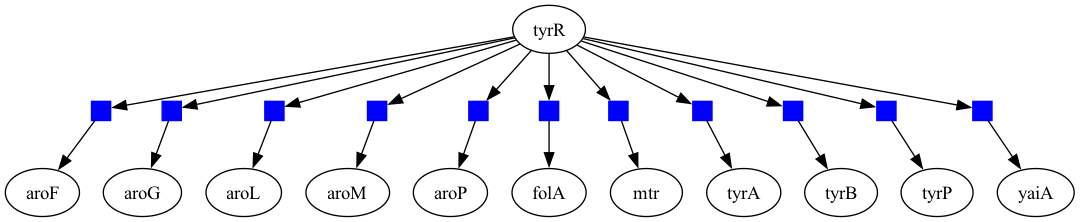

In [25]:
#import nocap.utility as utility
import mira
import pyciemss
import networkx as nx
from mira.modeling.amr.petrinet import AMRPetriNetModel
from mira.modeling import Model
from pathlib import Path
import matplotlib.pyplot as plt
import tellurium as te
from mira.sources.sbml import template_model_from_sbml_file
import pyciemss.visuals.plots as plots
from mira.modeling.ode import OdeModel
from mira.modeling.viz import GraphicalModel
from mira.modeling import Model
from mira.metamodel import Distribution

import numpy as np
import pandas as pd
import torch

mira_model = template_model_from_sbml_file(sbml_filename)

# assign priors for the model parameters
for name,parameter in mira_model.parameters.items():
    if name != "default_compartment":
        parameter.distribution = Distribution(type="Uniform1", parameters={"minimum": 0.99, "maximum": 1.11})

# display(mira_model.parameters)
# display(mira_model.initials)

petrinet_model_filename = model_name + '_petrinet_w_priors.json'
file_root = Path(petrinet_model_filename).stem
petrinet_model = AMRPetriNetModel(Model(mira_model))
petrinet_model.to_json_file(
                petrinet_model_filename,
                name=file_root,
                description=file_root,
                indent=2,
            )

om = OdeModel(Model(mira_model), initialized=False)
display(om.get_interpretable_kinetics())

display(GraphicalModel.for_jupyter(mira_model))

In [29]:
start_time = 0.0
end_time = 1.0
logging_step_size = 0.1
num_samples = 1


petrinet_results = pyciemss.sample(petrinet_model_filename, end_time, logging_step_size, num_samples, start_time=start_time, solver_method='euler', solver_options={'step_size':logging_step_size/2})




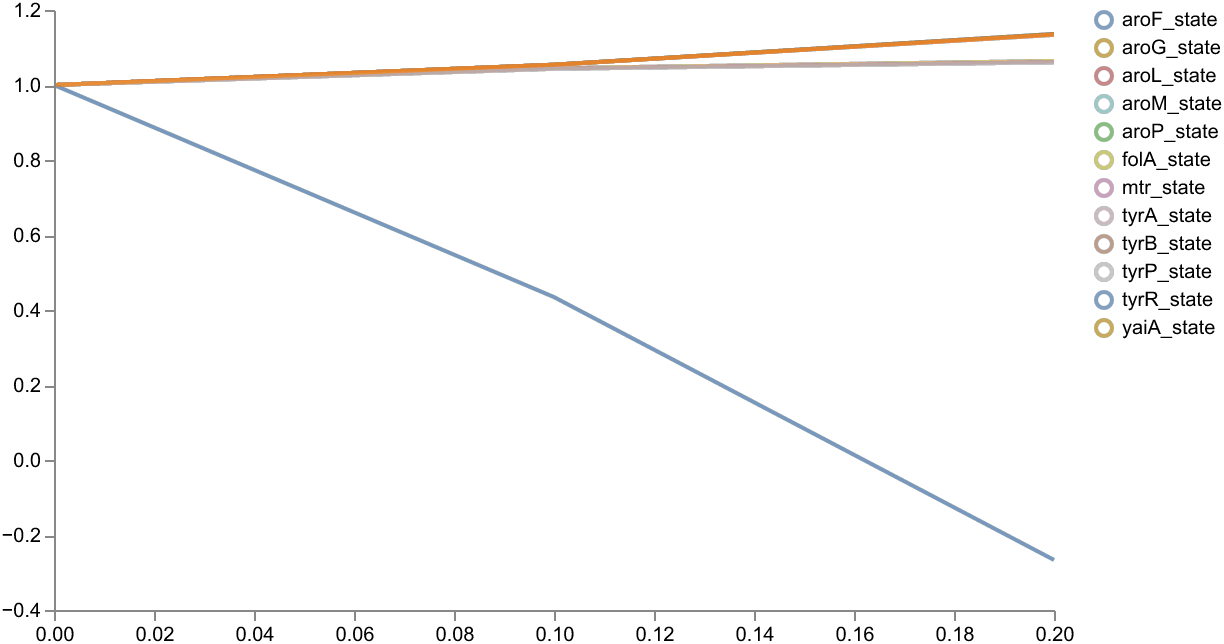

In [30]:
# Plot results for all states
schema = plots.trajectories(petrinet_results["data"], keep=".*_state")
plots.ipy_display(schema, dpi=150)

In [32]:


dag_df_for_pyciemss = dag_df.copy().T


# Reset the index
dag_df_for_pyciemss = dag_df_for_pyciemss.reset_index()

# Add a new column with sequential numbers
dag_df_for_pyciemss.insert(0, 'Timestamp', range(len(dag_df_for_pyciemss)))

dag_df_for_pyciemss.drop(columns=['Cell Barcode'], inplace=True)

# Display the updated DataFrame
display(dag_df_for_pyciemss.head())

# Save the DataFrame to a CSV file
data_filepath = "../TRIPS_data/pyciemss_data.csv"
dag_df_for_pyciemss.to_csv(data_filepath, index=False)


model_path_or_json = petrinet_model_filename
data_mapping = {k: k for k in dag_df_for_pyciemss.columns if k != 'Timestamp'}
start_time = 0.0
num_iterations = 1

# calibration_results = pyciemss.calibrate(model_path_or_json, data_filepath, data_mapping=data_mapping, 
#                                          num_iterations=num_iterations, verbose=False, 
#                                          start_time=start_time, 
#                                          solver_method='euler', solver_options={'step_size':logging_step_size/2})


calibration_results = pyciemss.calibrate(model_path_or_json, data_filepath, data_mapping=data_mapping, 
                                            num_iterations=num_iterations, verbose=True, 
                                            start_time=start_time, solver_method='euler', solver_options={'step_size':logging_step_size/2})


,Timestamp,tyrB,tyrR,yaiA,folA,mtr,tyrP,tyrA,aroL,aroM,aroG,aroP,aroF
0,0,1.830633,0.203295,-0.979975,0.623333,2.675434,0.268526,0.416176,0.103544,-0.362778,0.709800,0.095322,-0.662511
1,1,1.982483,-0.842222,0.465890,0.623333,1.162623,2.962589,-0.632588,-0.890483,0.744003,1.511905,-1.429823,0.228168
2,2,-0.295263,0.726053,-0.401629,-0.374000,1.162623,-0.682320,-1.007147,-1.387496,-2.354986,-0.092306,-1.048537,-1.058369
3,3,0.008436,-0.946773,-0.112456,-0.374000,1.666894,-0.365371,-0.557676,-2.381523,-1.248204,0.022281,-0.476608,-0.860440
4,4,1.830633,-0.005808,-0.690802,0.623333,0.406218,0.427000,-0.857324,-1.138989,-1.248204,1.282732,-0.095322,-0.266654


/Users/geor228/Github/pyciemss/pyciemss/integration_utils/observation.py:49: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Data printout: This dataset contains 35 rows of data. The first column, Timestamp, begins at 0 and ends at 35. The subsequent columns are named: tyrB, tyrR, yaiA, folA, mtr, tyrP, tyrA, aroL, aroM, aroG, aroP, aroF


ERROR:root:
                ###############################

                There was an exception in pyciemss

                Error occured in function: calibrate

                Function docs : 
    Infer parameters for a DynamicalSystem model conditional on data.
    This uses variational inference with a mean-field variational family to infer the parameters of the model.

    Args:
        - model_path_or_json: Union[str, Dict]
            - A path to a AMR model file or JSON containing a model in AMR form.
        - data_path: str
            - A path to the data file.
        - data_mapping: Dict[str, str]
            - A mapping from column names in the data file to state variable names in the model.
                - keys: str name of column in dataset
                - values: str name of state/observable in model
            - If not provided, we will assume that the column names in the data file match the state variable names.
        - noise_model: str
            - The 

ValueError: Expected parameter loc (Tensor of shape (36,)) of distribution Normal(loc: torch.Size([36]), scale: torch.Size([36])) to satisfy the constraint Real(), but found invalid values:
tensor([1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       grad_fn=<CatBackward0>)
                    Trace Shapes:  
                     Param Sites:  
                    Sample Sites:  
   persistent_n_tyrR_to_aroF dist |
                            value |
   persistent_n_tyrR_to_aroG dist |
                            value |
   persistent_n_tyrR_to_aroL dist |
                            value |
   persistent_n_tyrR_to_aroM dist |
                            value |
   persistent_n_tyrR_to_aroP dist |
                            value |
   persistent_K_tyrR_to_folA dist |
                            value |
   persistent_n_tyrR_to_folA dist |
                            value |
    persistent_K_tyrR_to_mtr dist |
                            value |
    persistent_n_tyrR_to_mtr dist |
                            value |
   persistent_n_tyrR_to_tyrA dist |
                            value |
   persistent_n_tyrR_to_tyrB dist |
                            value |
   persistent_K_tyrR_to_tyrP dist |
                            value |
   persistent_n_tyrR_to_tyrP dist |
                            value |
   persistent_n_tyrR_to_yaiA dist |
                            value |
persistent_beta_tyrR_to_aroF dist |
                            value |
   persistent_K_tyrR_to_aroF dist |
                            value |
persistent_beta_tyrR_to_aroG dist |
                            value |
   persistent_K_tyrR_to_aroG dist |
                            value |
persistent_beta_tyrR_to_aroL dist |
                            value |
   persistent_K_tyrR_to_aroL dist |
                            value |
persistent_beta_tyrR_to_aroM dist |
                            value |
   persistent_K_tyrR_to_aroM dist |
                            value |
persistent_beta_tyrR_to_aroP dist |
                            value |
   persistent_K_tyrR_to_aroP dist |
                            value |
persistent_beta_tyrR_to_folA dist |
                            value |
 persistent_beta_tyrR_to_mtr dist |
                            value |
persistent_beta_tyrR_to_tyrA dist |
                            value |
   persistent_K_tyrR_to_tyrA dist |
                            value |
persistent_beta_tyrR_to_tyrB dist |
                            value |
   persistent_K_tyrR_to_tyrB dist |
                            value |
persistent_beta_tyrR_to_tyrP dist |
                            value |
persistent_beta_tyrR_to_yaiA dist |
                            value |
   persistent_K_tyrR_to_yaiA dist |
                            value |

In [ ]:
# set simulation and sampling parameters
start_time = 0
end_time = 35
logging_step_size = 1
num_samples = 1

parameter_estimates = calibration_results["inferred_parameters"]

calibrated_sample_results = pyciemss.sample(petrinet_model_filename, end_time, logging_step_size, num_samples, 
                start_time=start_time, inferred_parameters=parameter_estimates,solver_method='scipy_solver', 
                                            solver_options={'solver':'LSODA'})

schema = plots.trajectories(calibrated_sample_results["data"], keep=".*_state")
plots.ipy_display(schema, dpi=150)